In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# Initial assumptions
* **id** - drop
* **dateDate** - house prices could be seasonal, keep for now
* **pricePrice** - this is the  **target**
* **bedroomsNumber** -  check for outliers, possibly make categorical
* **bathroomsNumber** -  check for outliers, possibly make categorical
* **sqft_livingsquare** -  numerical, check stats
* **sqft_lotsquare** -  numerical, check stats
* **floorsTotal** -  check for outliers, possibly make categorical, does this matter?
* **waterfront** - probably high value, but few houses
* **view** - Has been viewed, does this matter
* **condition** - Categorical
* **grade** - Categorical
* **sqft_above** - closely related to sqft_living space
* **sqft_basement** - square footage of the basement
* **yr_built** - may bin these years, new houses are desirable, so are established neighborhoods
* **yr_renovated** - new column for recent or not
* **zipcode** - zip - location, probably important
* **lat** - location - probably important
* **long** - location - probably important
* **sqft_living15** - if this can identify housing comps it is very relevant, else drop
* **sqft_lot15** - if this can identify housing comps it is very relevant, else drop


In [3]:
df.shape
# running stats. 21,000 rows, 21 columns

(21597, 21)

In [4]:
# quick preview of the data. Already see some NaN
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# check end of the data too.
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [6]:
df.info()
# check the basic info of the data. Mainly numeric. 
# Date needs to be converted if we keep it. Why is sqft_basement and object?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
df.describe()
# check 5 point statistics. Things that jump out immediately: 
# #Bedrooms max 33; 
# sqft_lot sd>mean, max is very high; 
# floor 1-3.5; waterfront 0-1; view 0-4; condition 1-5; grade 3-13; build 1900-2015; renov - not sure
# zipcode, lat, log look as expected

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.isnull().sum()
# check for Nans: Waterfront, view, renov

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
# how many unique values does each column have?
for col in df:
    print(col, df[col].nunique())

id 21420
date 372
price 3622
bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 5
condition 5
grade 11
sqft_above 942
sqft_basement 304
yr_built 116
yr_renovated 70
zipcode 70
lat 5033
long 751
sqft_living15 777
sqft_lot15 8682


In [10]:
# investigate the counts of columns without a high number of unique values. First make a list, and then get value counts

low_uniq_col = []

for col in df:
    if df[col].nunique() < 100:
        low_uniq_col.append(df[col].name)
low_uniq_col

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_renovated',
 'zipcode']

In [11]:
# Column unique value counts

for col in df:
    if df[col].name in low_uniq_col:
        print('\n', col, '\n', df[col].value_counts(), df[col].value_counts().sum())



 bedrooms 
 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 21597

 bathrooms 
 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64 21597

 floors 
 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64 21597

 waterfront 
 0.0    19075
1.0      146
Name: waterfront, dtype: int64 19221

 view 
 0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64 21534

 condition 
 3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dt

In [12]:
# testing - adding column where waterfront has null value
df['water_null'] = np.where(df['waterfront'].isnull(), 1, 0)

In [13]:
df['water_null'].sum()

2376

In [14]:
df['water_null'].describe()

count    21597.000000
mean         0.110015
std          0.312916
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: water_null, dtype: float64

**investigate sqft_basement** - why is this column an object?
First, I'll look at unique values. Then I noticed that we have total living space and above living space. We could potentially calculate the missing basement values using those features

In [15]:
df.sqft_basement.unique()
# There's the problem. 5th item is  '?'

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [16]:
df.sqft_basement[0:8]
# Here's another view, direct from the column

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
Name: sqft_basement, dtype: object

In [17]:
# Create a new feature to calculate basement from total living area - above living area
df['basement2'] = df['sqft_living'] - df['sqft_above']

In [18]:
# A second new feature, that takes the numerical values from sqft_basement. Will keep the original for now to use as a filter
df['basement3'] = np.where(df['sqft_basement'] != '?', df['sqft_basement'], 0)

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_null,basement2,basement3
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,1,0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,400,400.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,0,0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,910,910.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,0.0


In [20]:
# The new feature takes on the type property as an object. Need to convert it. Check the stats. Mainly zeros
df['basement3'] = df['basement3'].astype(float).astype(int, copy=False)
df.basement3.describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: basement3, dtype: float64

In [21]:
# Now the test. If we filter out the rows with '?', is the calculated feature the same as the orignal?
df['test'] = np.where(df['sqft_basement'] != '?',df['basement2'] - df['basement3'],0)

In [22]:
# Sum should be zero. It is!
df['test'].sum()

0

In [ ]:
# New feature for renovated column.

In [23]:
# Can now drop the original, and placeholder columns
# df.drop("Unnamed: 0", axis=1, inplace=True)

**Run some visuals** 

Which graphs?

**Clean up Nan's** 

Waterfront - split database

Views - safe to replace

yr_renovate - safe to replace

drop 33 bedrooms

**Create split databases for Waterfront Nan and 0** 

First thought is to convert waterfront Nans to 0. Before we do that, let's check the 5 point stats

Will create split dataframe where waterfront = 0, waterfront = null, and waterfront = 1


In [24]:
# new dataframe for waterfront is null, using water_null column
df_water_null = df[df["water_null"] == 1]
print(df_water_null.shape)
df_water_null.describe()

(2376, 25)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_null,basement2,basement3,test
count,2.376000e+03,2.376000e+03,2376.000000,2376.000000,2376.000000,2.376000e+03,2376.000000,0.0,2370.000000,2376.000000,...,1946.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.0,2376.000000,2376.000000,2376.0
mean,4.484801e+09,5.294301e+05,3.361532,2.105745,2063.341330,1.530689e+04,1.486532,NaN,0.256540,3.408670,...,94.323227,98079.694865,47.561465,-122.213497,1980.507576,12366.675084,1.0,297.146465,292.798822,0.0
std,2.873451e+09,3.250794e+05,0.908079,0.764266,881.380488,4.595495e+04,0.535898,NaN,0.783974,0.652826,...,423.549734,53.949839,0.137431,0.140720,689.428551,24694.192000,0.0,440.511772,438.564289,0.0
min,1.000102e+06,8.000000e+04,1.000000,0.750000,430.000000,6.000000e+02,1.000000,NaN,0.000000,1.000000,...,0.000000,98001.000000,47.180800,-122.503000,780.000000,788.000000,1.0,0.000000,0.000000,0.0
25%,2.112250e+09,3.228750e+05,3.000000,1.500000,1430.000000,5.031750e+03,1.000000,NaN,0.000000,3.000000,...,0.000000,98033.750000,47.472925,-122.327000,1470.000000,5108.000000,1.0,0.000000,0.000000,0.0
50%,3.789200e+09,4.450000e+05,3.000000,2.250000,1900.000000,7.607000e+03,1.500000,NaN,0.000000,3.000000,...,0.000000,98070.000000,47.571400,-122.228000,1820.000000,7624.500000,1.0,0.000000,0.000000,0.0
75%,7.227501e+09,6.496125e+05,4.000000,2.500000,2520.000000,1.052475e+04,2.000000,NaN,0.000000,4.000000,...,0.000000,98118.000000,47.678000,-122.125750,2370.000000,10001.250000,1.0,600.000000,590.000000,0.0
max,9.839301e+09,3.200000e+06,8.000000,6.500000,7730.000000,1.074218e+06,3.500000,NaN,4.000000,5.000000,...,2015.000000,98199.000000,47.777400,-121.319000,4940.000000,311610.000000,1.0,2160.000000,2160.000000,0.0


In [25]:
# new dataframes for waterfront 0 and 1
df_water_no = df[df["waterfront"] == 0]
df_water_yes = df[df["waterfront"] == 1]

In [26]:
print(df_water_no.shape)
df_water_no.describe()

(19075, 25)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_null,basement2,basement3,test
count,1.907500e+04,1.907500e+04,19075.000000,19075.000000,19075.000000,1.907500e+04,19075.000000,19075.0,19019.000000,19075.000000,...,15688.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.0,19075.000000,19075.000000,19075.0
mean,4.593352e+09,5.326420e+05,3.374836,2.112543,2073.524404,1.499112e+04,1.493997,0.0,0.203954,3.408965,...,79.280087,98077.591140,47.560078,-122.213552,1982.052949,12729.486186,0.0,287.649279,281.445662,0.0
std,2.877189e+09,3.449592e+05,0.927144,0.764537,909.083746,4.077700e+04,0.539980,0.0,0.698385,0.649431,...,389.881401,53.373727,0.138857,0.140740,680.982492,27593.553043,0.0,437.333169,434.259744,0.0
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.0,0.000000,0.000000,0.0
25%,2.124079e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.036500e+03,1.000000,0.0,0.000000,3.000000,...,0.000000,98032.000000,47.471200,-122.328000,1490.000000,5100.000000,0.0,0.000000,0.000000,0.0
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.589000e+03,1.500000,0.0,0.000000,3.000000,...,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7600.000000,0.0,0.000000,0.000000,0.0
75%,7.334401e+09,6.386000e+05,4.000000,2.500000,2540.000000,1.058400e+04,2.000000,0.0,0.000000,4.000000,...,0.000000,98117.000000,47.678200,-122.125000,2350.000000,10031.500000,0.0,550.000000,530.000000,0.0
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,0.0,4130.000000,4130.000000,0.0


In [27]:
print(df_water_yes.shape)
df_water_yes.describe()

(146, 25)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_null,basement2,basement3,test
count,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,145.000000,146.000000,...,121.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,146.000000,146.000000,146.0
mean,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.786207,3.541096,...,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630,0.0,735.993151,728.458904,0.0
std,2.858045e+09,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.555105,0.743957,...,852.484732,60.599756,0.113744,0.123772,808.410448,23264.085993,0.0,803.728076,808.010866,0.0
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,...,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000,0.0,0.000000,0.000000,0.0
25%,2.016369e+09,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,3.000000,...,0.000000,98040.000000,47.452550,-122.376000,2075.000000,11991.500000,0.0,0.000000,0.000000,0.0
50%,3.692780e+09,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,3.000000,...,0.000000,98075.000000,47.548150,-122.273500,2695.000000,16260.500000,0.0,560.000000,535.000000,0.0
75%,7.390450e+09,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,4.000000,...,0.000000,98155.000000,47.607550,-122.210000,3140.000000,24537.500000,0.0,1265.000000,1265.000000,0.0
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,...,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000,0.0,4820.000000,4820.000000,0.0


In [28]:
# Here's an alternative way to look at 5 point stats for waterfront without the need to create new databases

df.iloc[:, 1:9].groupby(['waterfront']).describe().transpose()

waterfront                  0.0           1.0
price       count  1.907500e+04  1.460000e+02
            mean   5.326420e+05  1.717215e+06
            std    3.449592e+05  1.145385e+06
            min    7.800000e+04  2.850000e+05
            25%    3.200000e+05  8.275000e+05
            50%    4.500000e+05  1.510000e+06
            75%    6.386000e+05  2.282500e+06
            max    7.700000e+06  7.060000e+06
bedrooms    count  1.907500e+04  1.460000e+02
            mean   3.374836e+00  3.349315e+00
            std    9.271436e-01  1.099169e+00
            min    1.000000e+00  1.000000e+00
            25%    3.000000e+00  3.000000e+00
            50%    3.000000e+00  3.000000e+00
            75%    4.000000e+00  4.000000e+00
            max    3.300000e+01  6.000000e+00
bathrooms   count  1.907500e+04  1.460000e+02
            mean   2.112543e+00  2.708904e+00
            std    7.645374e-01  1.121509e+00
            min    5.000000e-01  7.500000e-01
            25%    1.750000e+00  1.812500e+00
            50%    2.250000e+00  2.500000e+00
            75%    2.500000e+00  3.250000e+00
            max    8.000000e+00  6.750000e+00
sqft_living count  1.907500e+04  1.460000e+02
            mean   2.073524e+03  3.244753e+03
            std    9.090837e+02  1.652135e+03
            min    3.700000e+02  4.400000e+02
            25%    1.420000e+03  2.082500e+03
            50%    1.910000e+03  2.900000e+03
            75%    2.540000e+03  4.117500e+03
            max    1.354000e+04  1.004000e+04
sqft_lot    count  1.907500e+04  1.460000e+02
            mean   1.499112e+04  2.587088e+04
            std    4.077700e+04  4.462908e+04
            min    5.200000e+02  1.989000e+03
            25%    5.036500e+03  1.169225e+04
            50%    7.589000e+03  1.773050e+04
            75%    1.058400e+04  2.669250e+04
            max    1.651359e+06  5.051660e+05
floors      count  1.907500e+04  1.460000e+02
            mean   1.493997e+00  1.630137e+00
            std    5.399798e-01  5.478950e-01
            min    1.000000e+00  1.000000e+00
            25%    1.000000e+00  1.000000e+00
            50%    1.500000e+00  2.000000e+00
            75%    2.000000e+00  2.000000e+00
            max    3.500000e+00  3.000000e+00

In [29]:
# or looking at just the mean in a couple of columns
df.groupby('waterfront')['price', 'bedrooms'].mean()

,price,bedrooms
waterfront,,
0.0,5.326420e+05,3.374836
1.0,1.717215e+06,3.349315


In [30]:
# The statistics for waterfront = 0, and waterfront = null look very similar. Ok to change NaNs to zero
df.waterfront = df.waterfront.fillna(0)

In [31]:
print(df['waterfront'].value_counts())

0.0    21451
1.0      146
Name: waterfront, dtype: int64


In [32]:
# view only has 63 null values. Ok to change NaNs to zero
df.view = df.view.fillna(0)

In [33]:
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [34]:
# yr_renovated requires a year for the renovation. The vast majority of this column is zero. 
# With no additional information to go on, it's safest to change Nan's to zero

df.yr_renovated = df.yr_renovated.fillna(0)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
water_null       21597 non-null int32
basement2        21597 non-null int64

**Drop Columns**

Now that we've cleaned up NaN's and '?'s. Let's drop some columns

In [36]:
df = df.drop(['id', 'date', 'water_null', 'sqft_basement', 'basement3', 'test'], axis =1)
print(df.shape)
df.head()

(21597, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [76]:
df.loc[(df['bedrooms'] == 33)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
15856,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,1947,0.0,98103,47.6878,-122.331,1330,4700,580


In [79]:
df.drop(df[df["bedrooms"] == 33].index, inplace = True)

In [81]:
df.shape

(21596, 19)

In [131]:
df.loc[df['price'] > 6000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
3910,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,1940,2001.0,98004,47.6500,-122.214,3930,25449,2360
7245,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,1910,1987.0,98102,47.6298,-122.323,3940,8800,3480
9245,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,2001,0.0,98039,47.6305,-122.240,4540,42730,1030


In [88]:
df.loc[df['sqft_lot'] > 1000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
1717,700000.0,4,1.00,1300,1651359,1.0,0.0,3.0,4,6,1300,1920,0.0,98022,47.2313,-122.023,2560,425581,0
7640,542500.0,5,3.25,3010,1074218,1.5,0.0,0.0,5,8,2010,1931,0.0,98027,47.4564,-122.004,2450,68825,1000
7762,855000.0,4,3.50,4030,1024068,2.0,0.0,0.0,3,10,4030,2006,0.0,98045,47.4619,-121.744,1830,11700,0
17305,190000.0,2,1.00,710,1164794,1.0,0.0,0.0,2,5,710,1915,0.0,98014,47.6888,-121.909,1680,16730,0


In [91]:
df.loc[df['sqft_lot15'] > 500000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
9705,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,3,11,3605,2003,0.0,98014,47.6760,-121.882,3420,871200,1940
13451,790000.0,3,2.5,2640,432036,1.5,0.0,3.0,3,10,2640,1996,0.0,98022,47.1795,-122.036,1500,560617,0
20436,1600000.0,4,5.5,6530,871200,2.0,0.0,2.0,3,11,6530,2008,0.0,98014,47.6640,-121.878,1280,858132,0


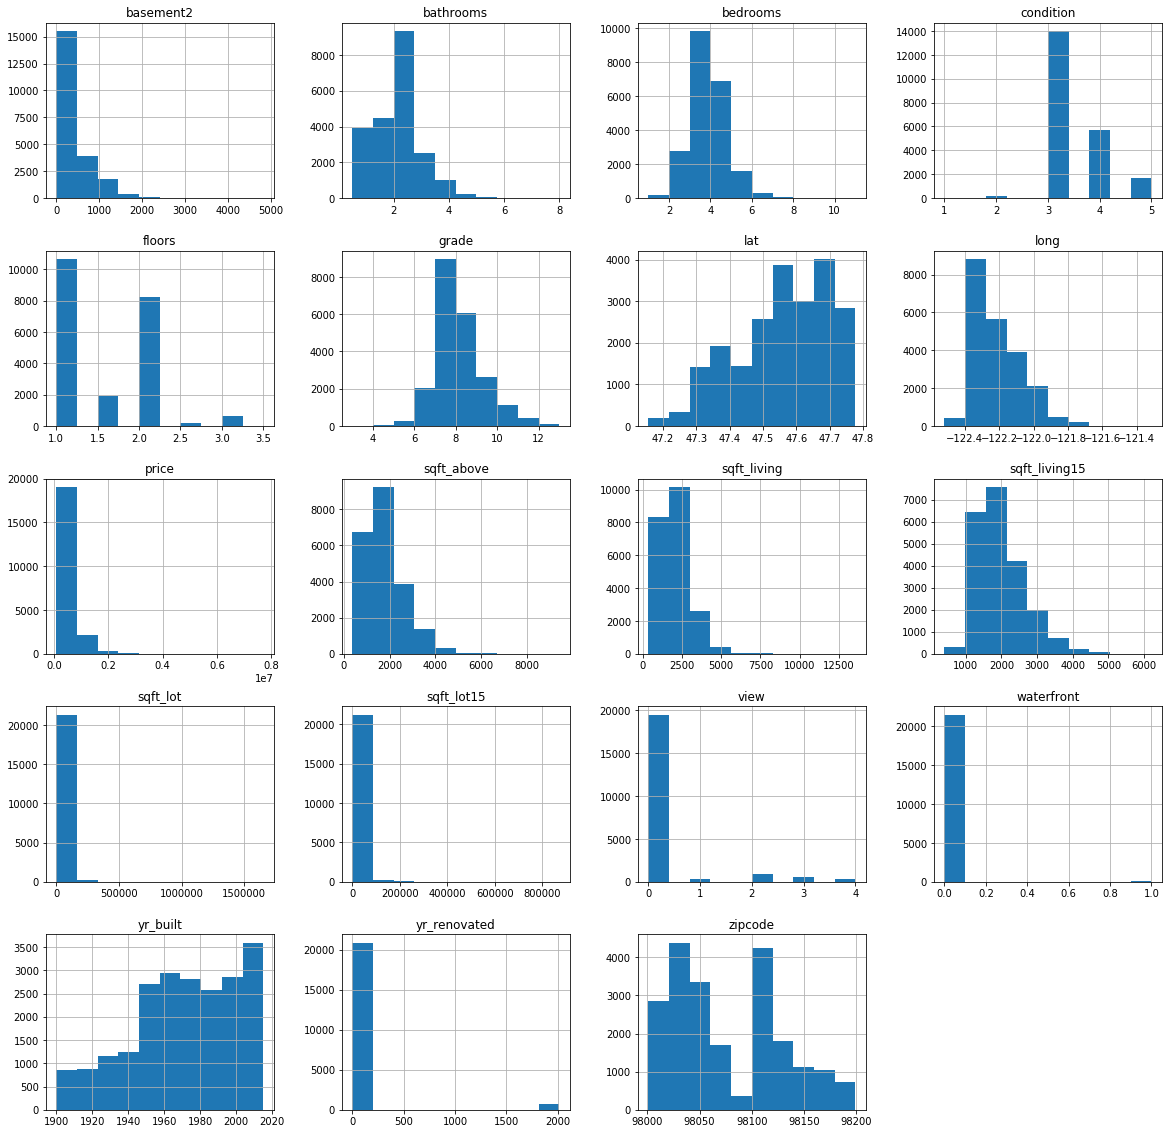

In [82]:
df.hist(figsize = (20,20));

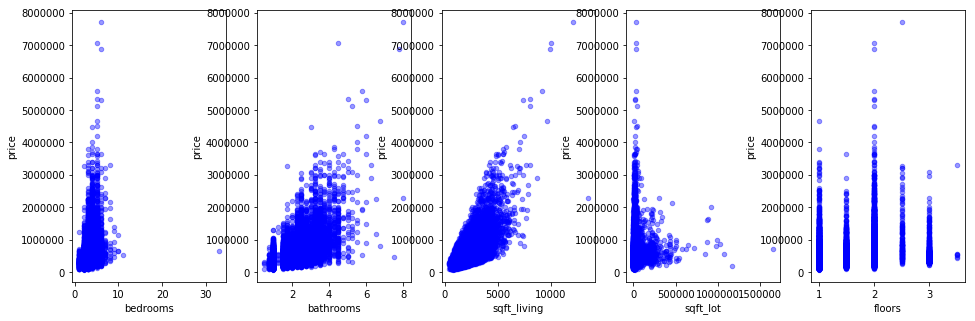

In [60]:
xlist = df.iloc[:, 1:6]
xlist.head()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,5))
for col, ax in zip(list(xlist), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

# df.plot(kind='scatter', x='xlist', y='price', alpha=0.4, color='b');

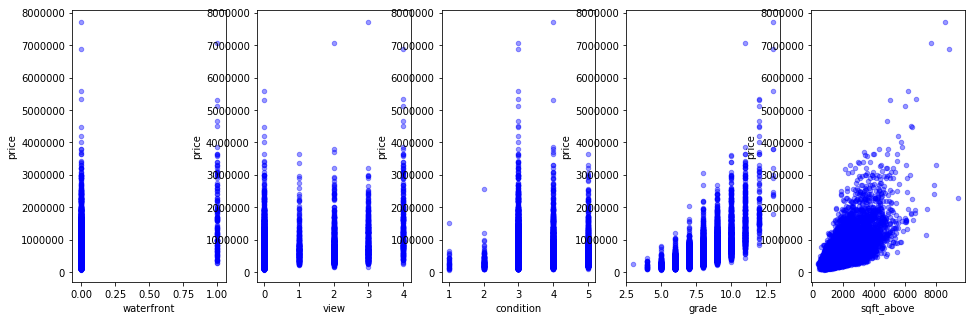

In [61]:
xlist2 = df.iloc[:, 6:11]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,5))
for col, ax in zip(list(xlist2), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

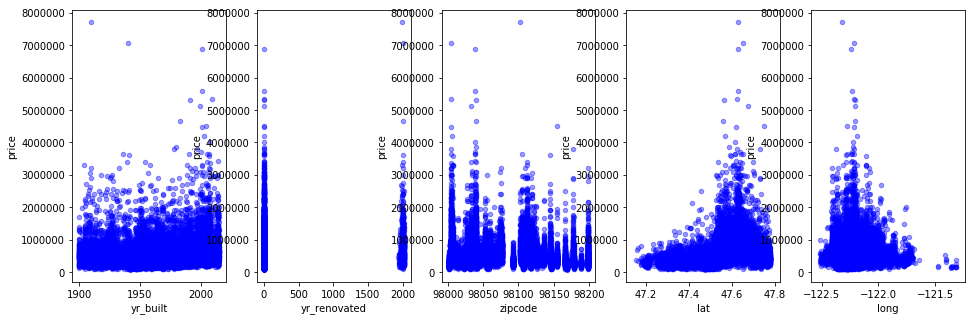

In [93]:
xlist3 = df.iloc[:, 11:16]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,5))
for col, ax in zip(list(xlist3), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

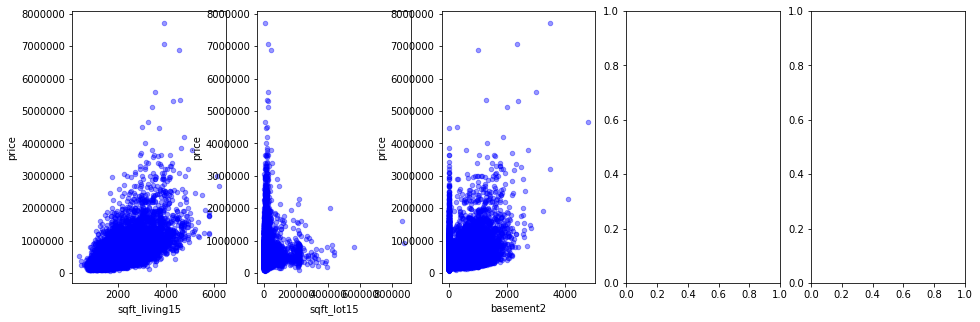

In [63]:
xlist4 = df.iloc[:, 16:]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,5))
for col, ax in zip(list(xlist4), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

# New Columns

The master scatter plot doesn't show much detail for renovation, because most of the values are zero.
If you exclude 0, the price for houses with renovation seems to be increasing, especially around 2000.
Here's an example of a scatter plot renovated vs price for 2000 and beyond.

Let's add a column to capture this

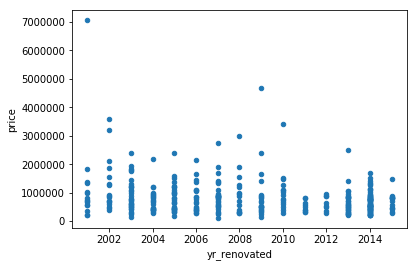

In [129]:
df_reno = df[df["yr_renovated"] > 2000]
df_reno.plot(kind='scatter', x='yr_renovated', y='price');


In [130]:
df_reno.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
count,3.500000e+02,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,8.338057e+05,3.608571,2.463571,2414.745714,10458.208571,1.505714,0.017143,0.454286,3.057143,7.951429,1869.082857,1942.934286,2008.554286,98098.434286,47.588782,-122.274126,1967.700000,9524.154286,545.662857
std,6.562883e+05,1.011926,0.861419,1136.265913,17551.585022,0.497813,0.129989,1.058150,0.277407,1.185121,868.137661,23.308538,4.515643,54.538438,0.109541,0.119166,729.341504,12583.653066,590.096443
min,1.100000e+05,1.000000,1.000000,580.000000,1306.000000,1.000000,0.000000,0.000000,3.000000,5.000000,580.000000,1900.000000,2001.000000,98001.000000,47.196000,-122.479000,828.000000,1281.000000,0.000000
25%,4.387500e+05,3.000000,1.750000,1627.500000,4800.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1252.500000,1924.000000,2005.000000,98042.750000,47.539100,-122.362000,1452.500000,4818.000000,0.000000
50%,7.040000e+05,4.000000,2.500000,2310.000000,6757.500000,1.500000,0.000000,0.000000,3.000000,8.000000,1720.000000,1946.000000,2008.000000,98115.000000,47.605700,-122.295500,1800.000000,6675.000000,530.000000
75%,9.703750e+05,4.000000,3.000000,2957.500000,9981.500000,2.000000,0.000000,0.000000,3.000000,9.000000,2300.000000,1961.000000,2013.000000,98126.000000,47.666325,-122.215000,2340.000000,10075.250000,910.000000
max,7.060000e+06,9.000000,6.750000,10040.000000,224769.000000,3.000000,1.000000,4.000000,5.000000,13.000000,7680.000000,2003.000000,2015.000000,98199.000000,47.777000,-121.359000,5500.000000,173804.000000,4820.000000


In [133]:
df['reno_recent'] = np.where(df['yr_renovated'] > 2000, 1, 0)

In [134]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2,reno_recent
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0
